In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-4/master/Projects/LetterRecognition_train.csv')

In [3]:
df.shape

(16000, 18)

In [4]:
df1 = df.set_index(['id'])

In [5]:
df1.columns

Index(['letter', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar',
       'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege',
       'yegvx'],
      dtype='object')

In [6]:
df1.head()

,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
id,,,,,,,,,,,,,,,,,
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
5,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7


In [7]:
df1['letter'].unique()

array(['I', 'D', 'N', 'G', 'S', 'B', 'A', 'J', 'M', 'X', 'O', 'R', 'F',
       'C', 'T', 'H', 'W', 'L', 'P', 'E', 'V', 'Y', 'Q', 'U', 'K', 'Z'],
      dtype=object)

In [8]:
df1['letter'].value_counts()

M    648
U    646
T    644
Y    641
D    638
P    635
A    633
B    630
X    628
V    628
F    622
N    617
E    616
Q    615
O    614
W    613
G    609
L    604
J    599
R    597
C    594
K    593
I    590
S    587
H    583
Z    576
Name: letter, dtype: int64

In [9]:
df1.dtypes

letter    object
x-box      int64
y-box      int64
width      int64
high       int64
onpix      int64
x-bar      int64
y-bar      int64
x2bar      int64
y2bar      int64
xybar      int64
x2ybr      int64
xy2br      int64
x-ege      int64
xegvy      int64
y-ege      int64
yegvx      int64
dtype: object

In [10]:
df1.isnull().sum()

letter    0
x-box     0
y-box     0
width     0
high      0
onpix     0
x-bar     0
y-bar     0
x2bar     0
y2bar     0
xybar     0
x2ybr     0
xy2br     0
x-ege     0
xegvy     0
y-ege     0
yegvx     0
dtype: int64

In [11]:
df1[df1['letter'] == 'A'].head()

,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
id,,,,,,,,,,,,,,,,,
7,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
78,A,3,7,5,5,3,12,2,3,2,10,2,9,2,6,3,8
118,A,3,8,5,6,3,9,2,2,3,8,2,8,2,6,3,7
130,A,2,1,4,2,1,8,1,2,2,7,2,8,2,5,2,7
134,A,3,7,5,5,3,10,4,1,2,8,3,9,2,4,2,7


In [12]:
df['letter'] = pd.factorize(df.letter)[0]

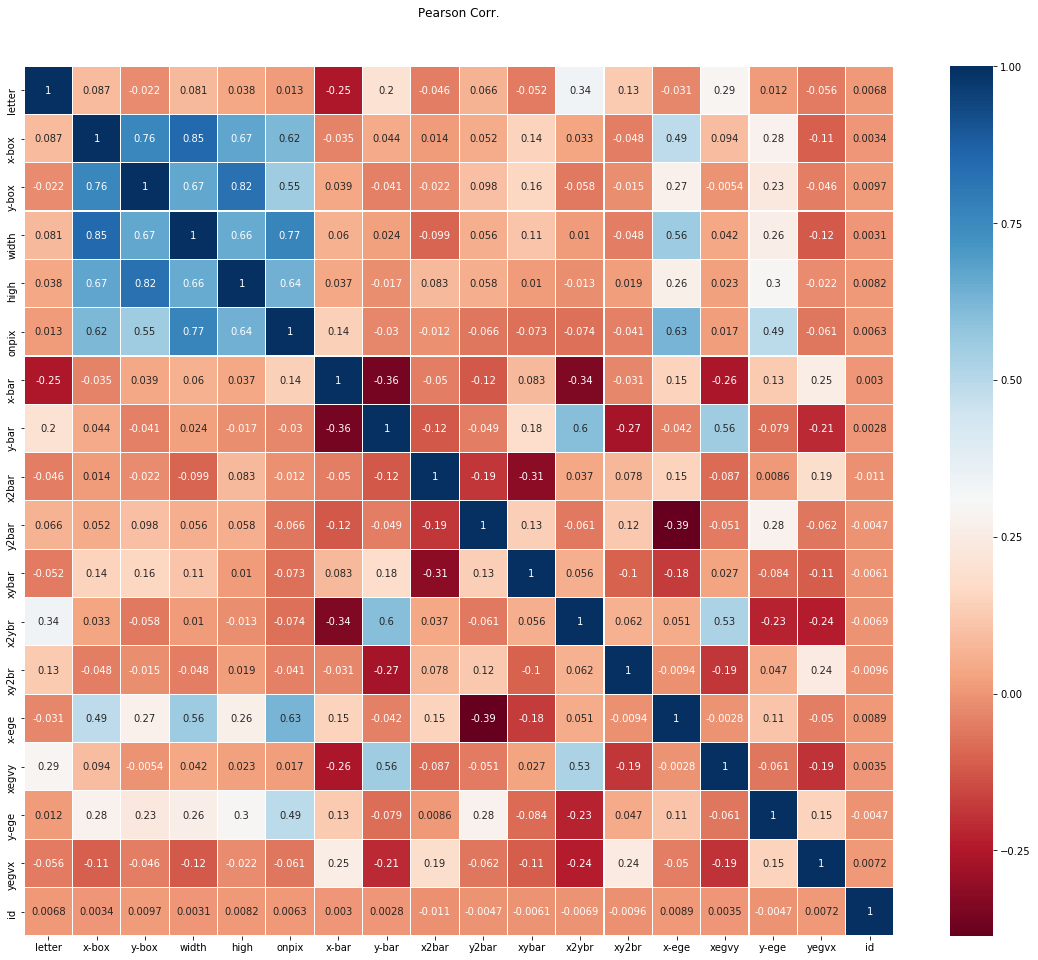

In [13]:
colormap = plt.cm.RdBu
plt.figure(figsize=(20,16))
plt.title('Pearson Corr.', y=1.05, size=12)
sns.heatmap(df.astype(float).corr(),linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

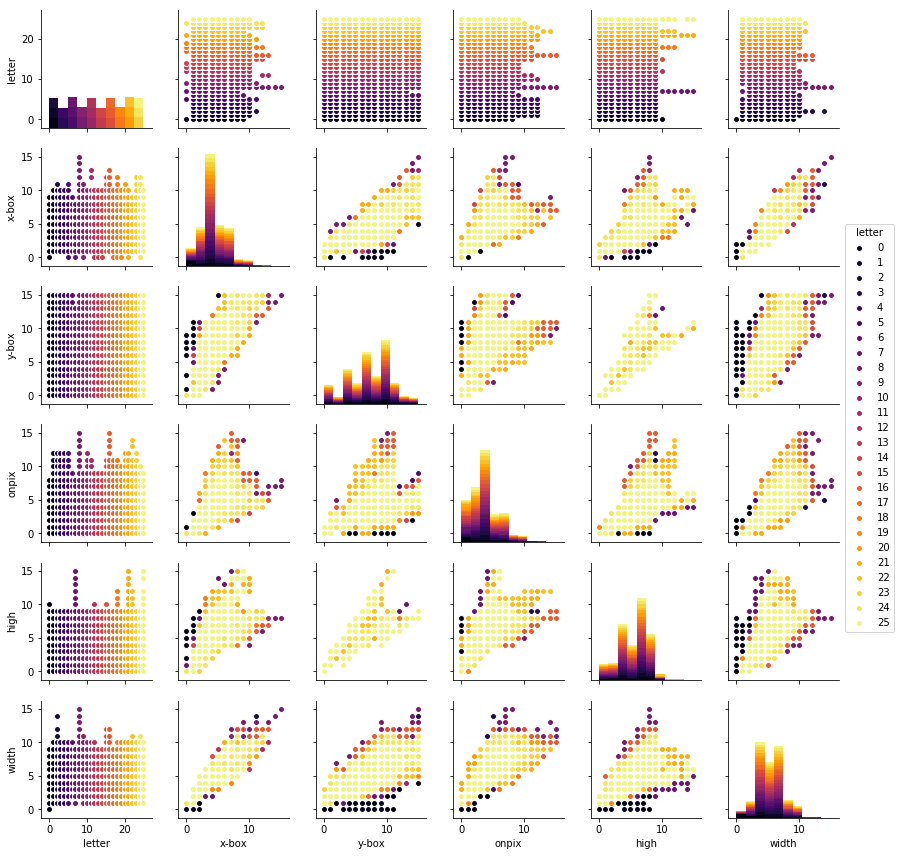

In [14]:
sns.pairplot(df.loc[:, ['letter', 'x-box', 'y-box', 'onpix', 'high', 'width']], hue="letter" ,palette="inferno", size=2)

In [15]:
X = df1.drop(['letter'], axis = 1)
ypred = df1.letter


In [16]:
test = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-4/master/Projects/LetterRecognition_test.csv')

In [17]:
test1 = test.set_index('id')

In [18]:
clf = SVC(C=0.8, kernel='poly')

In [19]:
clf.fit(X, ypred)

SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
Ypredict = clf.predict(test1)

In [21]:
Ypred = pd.DataFrame({'letter':Ypredict})

In [22]:
prediction = pd.concat([test['id'], Ypred], axis=1)
prediction.head(10)

,id,letter
0,16001,N
1,16002,V
2,16003,I
3,16004,N
4,16005,H
5,16006,E
6,16007,Y
7,16008,C
8,16009,E
9,16010,N


In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lr = LogisticRegression()

In [25]:
lr.fit(X, ypred)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
Ypredict1 = lr.predict(test1)

In [27]:
Ypred1 = pd.DataFrame({'letter':Ypredict1})

In [28]:
prediction = pd.concat([test['id'], Ypred1], axis=1)
prediction.head(10)

,id,letter
0,16001,N
1,16002,B
2,16003,S
3,16004,N
4,16005,F
5,16006,E
6,16007,V
7,16008,G
8,16009,E
9,16010,N


### Ensemble algorithms

#### Use of bagging methods

It builds multiple models independently and average the predictions. On averaging, since variance is reduced, combined estimator is usually better than any of the single base estimator

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

seed = 1050
np.random.seed(seed)

rf = RandomForestClassifier()
et = ExtraTreesClassifier()
knn = KNeighborsClassifier()
svc = SVC() 

clf_array = [rf, et, knn, svc]

for clf in clf_array:
    vanilla_score = cross_val_score(clf, X, ypred, cv = 10, n_jobs = -1)
    bagging_clf = BaggingClassifier(clf, max_samples=0.4 ,max_features= 10, random_state=seed)
    bagging_score = cross_val_score(bagging_clf, X, ypred ,cv = 10, n_jobs = -1 )
    
    print("Mean is : {1:.3f} and std: {2:.3f} of [{0}]".format(clf.__class__.__name__, vanilla_score.mean(), vanilla_score.std()))
    print("Mean is : {1:.3f} and std: {2:.3f} of [Bagging {0}]\n".format(clf.__class__.__name__, bagging_score.mean(), bagging_score.std()))

Mean is : 0.932 and std: 0.008 of [RandomForestClassifier]
Mean is : 0.932 and std: 0.004 of [Bagging RandomForestClassifier]

Mean is : 0.941 and std: 0.005 of [ExtraTreesClassifier]
Mean is : 0.943 and std: 0.006 of [Bagging ExtraTreesClassifier]

Mean is : 0.947 and std: 0.004 of [KNeighborsClassifier]
Mean is : 0.934 and std: 0.006 of [Bagging KNeighborsClassifier]

Mean is : 0.970 and std: 0.005 of [SVC]
Mean is : 0.940 and std: 0.006 of [Bagging SVC]



#### Apply prediction models on test data

In [30]:
bagging_et = BaggingClassifier(et, max_samples=0.4 ,max_features= 10, random_state=seed)
bagging_et.fit(X, ypred)

BaggingClassifier(base_estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=10,
         max_samples=0.4, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=1050, verbose=0, warm_start=False)

In [31]:
Ypredict_et = bagging_et.predict(test1)
Ypred_et = pd.DataFrame({'letter':Ypredict_et})
prediction_et = pd.concat([test['id'], Ypred_et], axis=1)
prediction_et.head(10)

,id,letter
0,16001,N
1,16002,V
2,16003,I
3,16004,N
4,16005,H
5,16006,E
6,16007,Y
7,16008,G
8,16009,E
9,16010,N


In [32]:
bagging_rf = BaggingClassifier(rf, max_samples=0.4 ,max_features= 10, random_state=seed)
bagging_rf.fit(X, ypred)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=10,
         max_samples=0.4, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=1050, verbose=0, warm_start=False)

In [33]:
Ypredict_rf = bagging_rf.predict(test1)
Ypred_rf = pd.DataFrame({'letter':Ypredict_rf})
prediction_rf = pd.concat([test['id'], Ypred_rf], axis=1)
prediction_rf.head(10)

,id,letter
0,16001,N
1,16002,B
2,16003,I
3,16004,N
4,16005,H
5,16006,E
6,16007,Y
7,16008,G
8,16009,E
9,16010,N


### Set up voting


In [34]:
eclf = VotingClassifier(estimators=[('Random Forests', rf), ('Extra Trees', et), 
                                    ('KNeighbors', knn), ('SVC', svc)], voting='hard')

for clf, label in zip([rf, et, knn, svc,eclf], ['Random Forest', 'Extra Trees', 
                                                     'KNeighbors', 'SVC','Ensemble']):
    scores = cross_val_score(clf, X, ypred, cv=10, scoring='accuracy')
    print("Mean: {0:.3f}, std: (+/-) {1:.3f} [{2}]".format(scores.mean(), scores.std(), label))

Mean: 0.930, std: (+/-) 0.007 [Random Forest]
Mean: 0.938, std: (+/-) 0.005 [Extra Trees]
Mean: 0.947, std: (+/-) 0.004 [KNeighbors]
Mean: 0.970, std: (+/-) 0.005 [SVC]


C:\Users\SUDHIR\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\SUDHIR\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\SUDHIR\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\SUDHIR\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, b

Mean: 0.963, std: (+/-) 0.004 [Ensemble]


C:\Users\SUDHIR\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [35]:
ebclf_array = []
eclf = VotingClassifier(estimators=[('Random Forests', rf), ('Extra Trees', et), 
                                     ('SVC', svc)], voting='hard')
for clf in [rf, et, knn, svc]:
    ebclf_array.append(BaggingClassifier(clf, max_samples=0.25, 
                                   max_features=10, random_state=seed))

v_eclf = VotingClassifier(estimators=zip(['Bagging Random Forest', 'Bagging Extra Trees', 'Bagging KNeighbors',
                                          'Bagging SVC', 'Bagging Ensemble'],ebclf_array), voting='hard')
                          

#ebclf_array.append(v_eclf)

for clf, label in zip(ebclf_array,  ['Bagging Random Forest', 'Bagging Extra Trees', 'Bagging KNeighbors', 
                              'Bagging SVC', 'Bagging Ensemble']):
    scores = cross_val_score(clf, X, ypred, cv=10, scoring='accuracy')
    print("Mean: {0:.3f}, std: (+/-) {1:.3f} [{2}]".format(scores.mean(), scores.std(), label))

Mean: 0.918, std: (+/-) 0.006 [Bagging Random Forest]
Mean: 0.931, std: (+/-) 0.006 [Bagging Extra Trees]
Mean: 0.920, std: (+/-) 0.006 [Bagging KNeighbors]
Mean: 0.924, std: (+/-) 0.007 [Bagging SVC]


In [36]:
scores = cross_val_score(eclf, X, ypred, cv=10, scoring='accuracy')
print("Mean: {0:.3f}, std: (+/-) {1:.3f} [Ensamble]".format(scores.mean(), scores.std(), label))



C:\Users\SUDHIR\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\SUDHIR\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\SUDHIR\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\SUDHIR\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, b

Mean: 0.961, std: (+/-) 0.005 [Ensamble]


C:\Users\SUDHIR\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [37]:
v_eclf = VotingClassifier(estimators= [('Bagging Random Forest', ebclf_array[0]), ('Bagging Extra Trees', ebclf_array[1]), ('Bagging KNeighbors', ebclf_array[2]), 
                                          ('Bagging SVC', ebclf_array[3])], voting='hard')

#scores = cross_val_score(v_eclf, X, ypred, cv=10)
#print("Mean: {0:.3f}, std: (+/-) {1:.3f} [Bagging Ensamble]".format(scores.mean(), scores.std(), label))
v_eclf.fit(X, ypred)

VotingClassifier(estimators=[('Bagging Random Forest', BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_sam...estimators=10, n_jobs=1, oob_score=False,
         random_state=1050, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [38]:
scores = cross_val_score(v_eclf, X, ypred, cv=10, scoring='accuracy')
print("Mean: {0:.3f}, std: (+/-) {1:.3f} [Bagging ensemble]".format(scores.mean(), scores.std(), label))

C:\Users\SUDHIR\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\SUDHIR\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\SUDHIR\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\SUDHIR\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, b

Mean: 0.933, std: (+/-) 0.006 [Bagging ensemble]


C:\Users\SUDHIR\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [39]:
Ypredict_v_eclf = v_eclf.predict(test1)
Ypred_rf = pd.DataFrame({'letter':Ypredict_rf})
prediction_rf = pd.concat([test['id'], Ypred_rf], axis=1)
prediction_rf.to_csv('EVCLF.csv', index = False)
prediction_rf.head(10)

C:\Users\SUDHIR\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,id,letter
0,16001,N
1,16002,B
2,16003,I
3,16004,N
4,16005,H
5,16006,E
6,16007,Y
7,16008,G
8,16009,E
9,16010,N


### Use of boosting methods

Base estimators are bulit sequentially and we tries to reduce the bias of combined estimator. The aim is to combine multiple weak models to produce powerful ensemble. 
It will definately takes more time while computaion 

In [40]:
from mlxtend.classifier import EnsembleVoteClassifier
import warnings
from xgboost import XGBClassifier, plot_importance
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

warnings.filterwarnings('ignore')

#### Create Boosting Classifiers


In [41]:
ada_boost = AdaBoostClassifier()
grad_boost = GradientBoostingClassifier()
xgb_boost = XGBClassifier()

boost_array = [ada_boost, grad_boost, xgb_boost]

eclf = EnsembleVoteClassifier(clfs = boost_array, voting = 'hard')
labels = ['Ada boost' , 'Grad boost' , 'Xgb boost', 'Ensemble']

for clf, label in zip([ada_boost, grad_boost, xgb_boost, eclf], labels):
    scores = cross_val_score(clf, X, ypred, cv = 10, scoring = 'accuracy')
    print("Mean: {0:.3f}, std: (+/-) {1:.3f} [{2}]".format(scores.mean(), scores.std(), label))

Mean: 0.249, std: (+/-) 0.035 [Ada boost]
Mean: 0.915, std: (+/-) 0.008 [Grad boost]
Mean: 0.883, std: (+/-) 0.008 [Xgb boost]
Mean: 0.892, std: (+/-) 0.007 [Ensemble]
